In [30]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('/Users/admin/Desktop/Y3/TikTok/Tiktok-hackerthon/lalalalla.xlsx')
queue_market = df['market']
columns_to_regress= ['moderator', 'Productivity', 'Utilisation %', 'handling time', 'accuracy']
df = df[columns_to_regress]

df.to_excel('Mod_TrainingData.xlsx', index = None)

In [31]:
# using
# - log_ad_rev
# - log_avg_ad_rev
# - log_baseline_st
# - log_punish
# - ad_run_time

trainingData = pd.read_excel('Mod_TrainingData.xlsx')
df_lr = trainingData.copy()
df_gb = trainingData.copy()
df_rf = trainingData.copy()

inf_count_lr = np.isinf(df_lr).sum()
inf_count_gb = np.isinf(df_gb).sum()

mod_lr = df_lr['moderator']
df_lr.drop(['moderator'], axis=1, inplace=True)

mod_gb = df_gb['moderator']
df_gb.drop(['moderator'], axis=1, inplace=True)

mod_rf = df_rf['moderator']
df_rf.drop(['moderator'], axis=1, inplace=True)

In [32]:
# use linear regression
coefs = {var: [] for var in df_lr.columns}
intercepts = []

for column in df_lr.columns:
    X = df_lr.drop(column, axis=1)
    y = df_lr[column]
    reg = LinearRegression().fit(X, y)
    print(f"Dependent variable: {column}")
    print("Coefficients:")
    for var, coef in zip(X.columns, reg.coef_):
        print(f"{var}: {coef}")
        coefs[var].append(coef)
    print(f"Intercept: {reg.intercept_}")
    intercepts.append(reg.intercept_)
    print('\n')

# Calculate the average coefficient for each independent variable
avg_coefs = {var: sum(coefs[var])/len(coefs[var]) for var in coefs}
# Calculate the average intercept
avg_intercept = sum(intercepts)/len(intercepts)
print("Average coefficients:")
for var, avg_coef in avg_coefs.items():
    print(f"{var}: {avg_coef}")
print(f"Average intercept: {avg_intercept}")

# linear regression Average coefficients:
# Productivity: 0.16821325362674747
# Utilisation %: 0.06356078873171524
# handling time: -0.002859751016959651
# accuracy: -0.18964369491998156
# Average intercept: 3.377778492044164

Dependent variable: Productivity
Coefficients:
Utilisation %: 0.2849907023224293
handling time: 0.0001530894792884062
accuracy: 0.058526327749269254
Intercept: 0.3891813113557472


Dependent variable: Utilisation %
Coefficients:
Productivity: 0.41464848993907205
handling time: -0.0024888322905491644
accuracy: 0.215143465280353
Intercept: 2.1558097737010793


Dependent variable: handling time
Coefficients:
Productivity: 0.023479372811746627
Utilisation %: -0.26235381394414437
accuracy: -0.8426008777895669
Intercept: 7.361818264308637


Dependent variable: accuracy
Coefficients:
Productivity: 0.06651189812942371
Utilisation %: 0.16804547781686077
handling time: -0.006243510239618194
Intercept: 3.6043046188111907


Average coefficients:
Productivity: 0.16821325362674747
Utilisation %: 0.06356078873171524
handling time: -0.002859751016959651
accuracy: -0.18964369491998156
Average intercept: 3.377778492044164


In [33]:
# Average coefficients and intercept for linear regression
avg_coefs = {
    'Productivity': 0.16821325362674747,
    'Utilisation %': 0.06356078873171524,
    'handling time': -0.002859751016959651,
    'accuracy': -0.18964369491998156
}
avg_intercept = 3.377778492044164

# Define the independent variables
X = df_lr[list(avg_coefs.keys())]

# Calculate the weighted average of the independent variables
mod_score_pred = X.dot(np.array(list(avg_coefs.values()))) + avg_intercept

# Add the moderator column and the predicted values for Y back to the DataFrame
df_lr['moderator'] = mod_lr
df_lr['queue_market'] = queue_market
df_lr['mod_score_pred'] = mod_score_pred
df_lr.to_excel('mod_df_lr.xlsx',index=None)

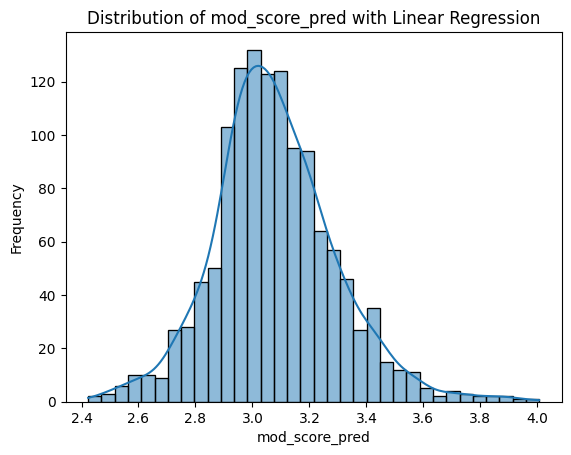

In [34]:
# Plot distribution of mod_score_pred 
sns.histplot(df_lr['mod_score_pred'], kde = True)

plt.title('Distribution of mod_score_pred with Linear Regression')
plt.xlabel('mod_score_pred')
plt.ylabel('Frequency')
plt.show()

In [35]:
# use gradient boosting regression
from sklearn.ensemble import GradientBoostingRegressor
# Initialize a dictionary to store the feature importances for each independent variable
importances = {var: [] for var in df_gb.columns}
# Initialize a list to store the intercepts for each dependent variable
intercepts = []

for column in df_gb.columns:
    X = df_gb.drop(column, axis=1)
    y = df_gb[column]
    reg = GradientBoostingRegressor().fit(X, y)
    print(f"Dependent variable: {column}")
    print("Feature importances:")
    for var, imp in zip(X.columns, reg.feature_importances_):
        print(f"{var}: {imp}")
        importances[var].append(imp)
    intercepts.append(reg.init_.constant_[0][0])
    print('\n')

# Calculate the average feature importance for each independent variable
avg_importances = {var: sum(importances[var])/len(importances[var]) for var in importances}
# Calculate the average intercept
avg_intercept = sum(intercepts)/len(intercepts)

print("Average feature importances:")
for var, avg_imp in avg_importances.items():
    print(f"{var}: {avg_imp}")
print(f"Average intercept: {avg_intercept}")

# GradientBoostingRegressor Average feature importances:
# Productivity: 0.20563577884720044
# Utilisation %: 0.46746375470307244
# handling time: 0.44697392095005967
# accuracy: 0.21325987883300068
# Average intercept: 3.1534027991004168

Dependent variable: Productivity
Feature importances:
Utilisation %: 0.49642765101315645
handling time: 0.39664727479022943
accuracy: 0.10692507419661411


Dependent variable: Utilisation %
Feature importances:
Productivity: 0.21754109032378507
handling time: 0.6168196398865219
accuracy: 0.16563926978969293


Dependent variable: handling time
Feature importances:
Productivity: 0.17613270865613384
Utilisation %: 0.4672261686258733
accuracy: 0.356641122717993


Dependent variable: accuracy
Feature importances:
Productivity: 0.2764181113321866
Utilisation %: 0.39959599677919544
handling time: 0.3239858918886179


Average feature importances:
Productivity: 0.22336397010403516
Utilisation %: 0.4544166054727417
handling time: 0.4458176021884565
accuracy: 0.2097351555681
Average intercept: 3.1534027991004168


In [36]:
# Gradient boosting average feature importances and intercept

avg_importances = {
    'Productivity': 0.20563577884720044,
    'Utilisation %': 0.46746375470307244,
    'handling time': 0.44697392095005967,
    'accuracy': 0.21325987883300068
}
avg_intercept = 3.1534027991004168
# Define the independent variables
X = df_gb[list(avg_importances.keys())]
# Calculate the weighted average of the independent variables
mod_score_pred = X.dot(np.array(list(avg_importances.values()))) + avg_intercept

df_gb['moderator'] = mod_gb
df_gb['mod_score_pred'] = mod_score_pred
df_gb.to_excel('mod_df_gb.xlsx',index=None)


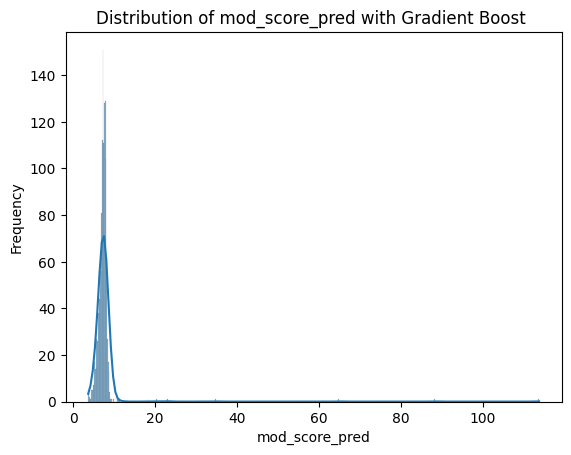

In [37]:
# Plot distribution of mod_score_pred 
sns.histplot(df_gb['mod_score_pred'], kde = True)

plt.title('Distribution of mod_score_pred with Gradient Boost ')
plt.xlabel('mod_score_pred')
plt.ylabel('Frequency')
plt.show()


In [38]:
# use random forest regressor
from sklearn.ensemble import RandomForestRegressor

importances_rf = {var: [] for var in df_rf.columns}
intercepts_rf = []

for column in df_rf.columns:
    X = df_rf.drop(column, axis=1)
    y = df_rf[column]
    reg = RandomForestRegressor().fit(X, y)
    print(f"Dependent variable: {column}")
    print("Feature importances:")
    for var, imp in zip(X.columns, reg.feature_importances_):
        print(f"{var}: {imp}")
        importances_rf[var].append(imp)
    intercepts_rf.append(reg.predict([[0]*len(X.columns)])[0] - sum(reg.feature_importances_))
    print('\n')

avg_importances_rf = {var: sum(importances_rf[var])/len(importances_rf[var]) for var in importances_rf}
avg_intercept_rf = sum(intercepts_rf)/len(intercepts_rf)

print("Average feature importances for Random Forest:")
for var, avg_imp in avg_importances_rf.items():
    print(f"{var}: {avg_imp}")
print(f"Average intercept: {avg_intercept_rf}")


# Average feature importances for Random Forest:
# Productivity: 0.22495224368510758
# Utilisation %: 0.42865962633561067
# handling time: 0.40557418107983495
# accuracy: 0.27414728223278023
# Average intercept: 0.26060427418429427

Dependent variable: Productivity
Feature importances:
Utilisation %: 0.40116377113104623
handling time: 0.3574319864235084
accuracy: 0.2414042424454453




/Users/admin/opt/anaconda3/envs/ipykernel_py3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Dependent variable: Utilisation %
Feature importances:
Productivity: 0.27392945845362376
handling time: 0.5242803975125055
accuracy: 0.20179014403387074




/Users/admin/opt/anaconda3/envs/ipykernel_py3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Dependent variable: handling time
Feature importances:
Productivity: 0.11060624970212135
Utilisation %: 0.5508149532253603
accuracy: 0.3385787970725182




/Users/admin/opt/anaconda3/envs/ipykernel_py3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Dependent variable: accuracy
Feature importances:
Productivity: 0.31514453678935034
Utilisation %: 0.35909757915626944
handling time: 0.3257578840543803


Average feature importances for Random Forest:
Productivity: 0.2332267483150318
Utilisation %: 0.4370254345042253
handling time: 0.40249008933013136
accuracy: 0.26059106118394476
Average intercept: 0.33494252339686514


/Users/admin/opt/anaconda3/envs/ipykernel_py3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [39]:
# random forest average feature importances and intercept

avg_importances = {
    'Productivity': 0.22495224368510758,
    'Utilisation %': 0.42865962633561067,
    'handling time': 0.40557418107983495,
    'accuracy': 0.27414728223278023
}
avg_intercept = 0.26060427418429427
# Define the independent variables
X = df_gb[list(avg_importances.keys())]
# Calculate the weighted average of the independent variables
mod_score_pred = X.dot(np.array(list(avg_importances.values()))) + avg_intercept

df_rf['moderator'] = mod_rf
df_rf['mod_score_pred'] = mod_score_pred
df_rf.to_excel('moderator_file.xlsx',index=None)


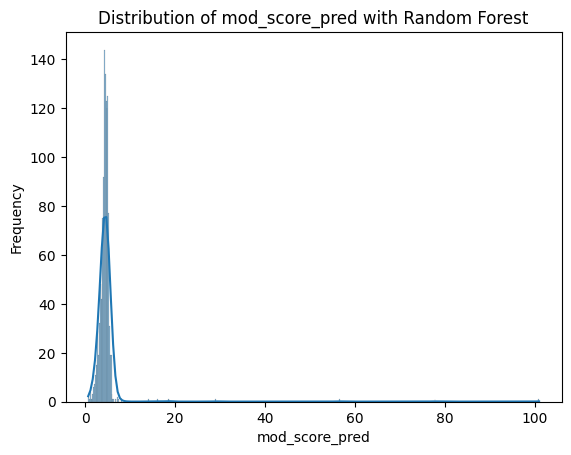

In [40]:
# Plot distribution of mod_score_pred 
sns.histplot(df_rf['mod_score_pred'], kde = True)

plt.title('Distribution of mod_score_pred with Random Forest')
plt.xlabel('mod_score_pred')
plt.ylabel('Frequency')
plt.show()